<a href="https://colab.research.google.com/github/Maruthiprasanna-25/fmml-lab-1/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

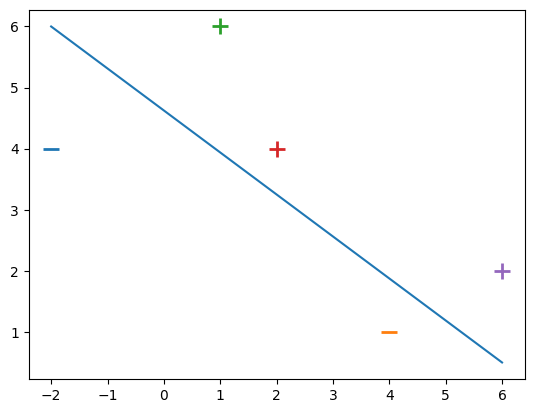

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

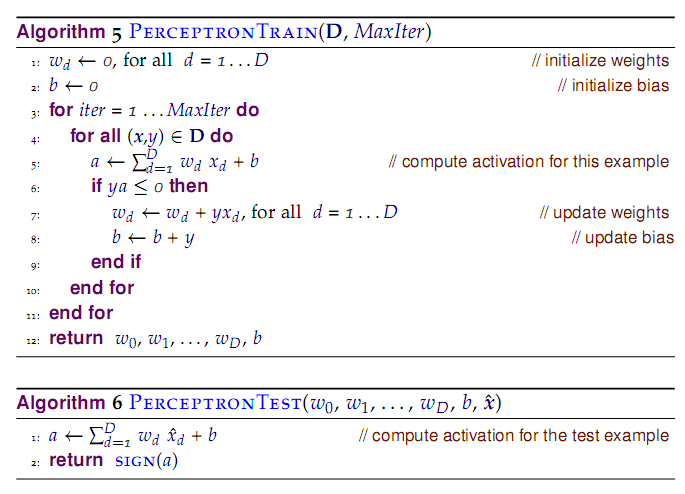

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

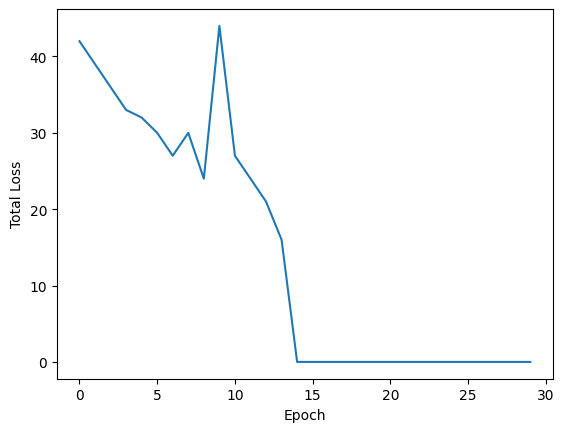

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

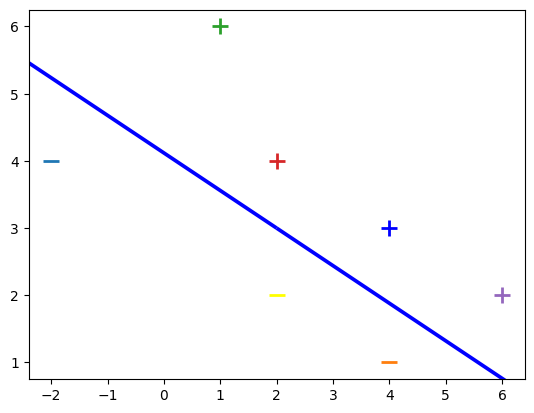

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [ ]:
QUESTION-1:
Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

The below code loads the Sonar dataset, preprocesses it by converting non-numeric labels using LabelEncoder, and generates a synthetic dataset for demonstration. It then applies the perceptron algorithm with a predefined learning rate and plots the total loss over epochs. The final weights are printed after training. This process helps visualize the convergence behavior of the perceptron on the Sonar dataset

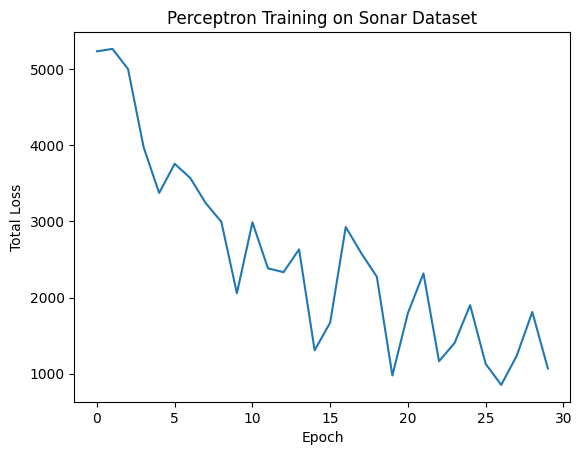

Final weights: [  6.93332891  22.87653506  -2.58474972  -7.41273527 102.66081729
 -34.02313373  48.86476304  11.12949515  40.76884849  65.42578761
 -28.77881691   4.73470552  56.57571859 -18.5755178  -57.6942473
  49.54742576   0.47455337 -22.2525007   42.63351486  47.64989318
  22.09471807 -46.73525316  -4.29620784  11.01995664  20.81719753
  -6.9174523   10.45162252  -3.47573602  54.71406066  31.41296273
 -40.07956332  51.34373937 -24.82927542  39.5285291   -2.65489566
  11.42120659 -60.80430855  27.45630366 -44.21281964  20.43905214
  82.51754001 -42.78415702  21.29073957   6.45150631   5.88955764
 -20.14515508 -25.04647099  38.35189776  53.61873425  19.73975696
 -24.71951387  10.5326434   -5.99554298  17.68421304 -97.71695764
  -6.84036089  -3.6529416  -42.97730038  48.55222301 -60.83357362]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Load the Sonar dataset
sonar_dataset_path = '/sonar.csv'
df = pd.read_csv(sonar_dataset_path)

# Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# If the target variable is not numeric
# we can use LabelEncoder to convert it to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# For demonstration purposes, let's use a synthetic dataset
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=100, n_features=60, n_informative=30, n_clusters_per_class=2, random_state=42)

# Convert labels to -1 and 1 for perceptron
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y[Y == 0] = -1

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for epoch in range(n):
        total_error = 0

        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]

        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron Training on Sonar Dataset')
    plt.show()

    return w

perceptron_weights = perceptron_algo_plot(X_train, Y_train)
print("Final weights:", perceptron_weights)


QUESTION-2:
Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

ANSWER:
The below code defines a perceptron training function with adjustable learning rates, and it's applied to the Sonar dataset. The dataset is loaded, and features and labels are prepared. Different learning rates are tested, and the total loss over epochs is plotted for each rate. The final weights after training are printed for each learning rate. This analysis helps observe how the perceptron converges with varying learning rates on the Sonar dataset.

[ ]


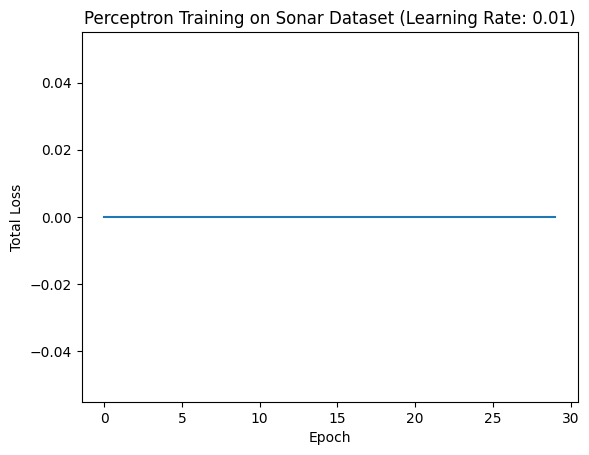

Final weights (Learning Rate 0.01): [8.560e-04 4.540e-04 3.820e-04 2.030e-04 3.850e-04 5.340e-04 2.140e-03
 3.110e-03 2.837e-03 2.751e-03 2.707e-03 9.460e-04 1.020e-03 4.519e-03
 6.737e-03 6.699e-03 7.066e-03 5.632e-03 3.785e-03 2.721e-03 5.297e-03
 7.697e-03 8.643e-03 9.304e-03 9.372e-03 6.247e-03 6.024e-03 6.810e-03
 5.047e-03 5.775e-03 4.754e-03 2.400e-03 2.779e-03 1.997e-03 5.305e-03
 7.409e-03 7.775e-03 4.424e-03 1.416e-03 3.508e-03 4.482e-03 4.208e-03
 3.054e-03 2.235e-03 2.611e-03 2.798e-03 2.392e-03 2.021e-03 1.326e-03
 3.580e-04 1.280e-04 1.720e-04 1.380e-04 7.900e-05 3.700e-05 5.100e-05
 2.580e-04 1.020e-04 3.700e-05 3.700e-05]


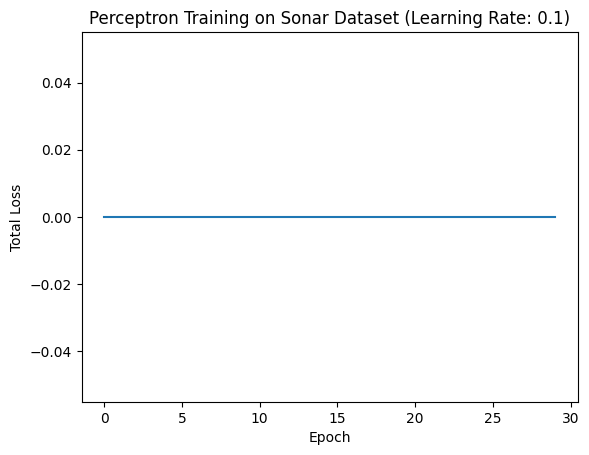

Final weights (Learning Rate 0.1): [0.00856 0.00454 0.00382 0.00203 0.00385 0.00534 0.0214  0.0311  0.02837
 0.02751 0.02707 0.00946 0.0102  0.04519 0.06737 0.06699 0.07066 0.05632
 0.03785 0.02721 0.05297 0.07697 0.08643 0.09304 0.09372 0.06247 0.06024
 0.0681  0.05047 0.05775 0.04754 0.024   0.02779 0.01997 0.05305 0.07409
 0.07775 0.04424 0.01416 0.03508 0.04482 0.04208 0.03054 0.02235 0.02611
 0.02798 0.02392 0.02021 0.01326 0.00358 0.00128 0.00172 0.00138 0.00079
 0.00037 0.00051 0.00258 0.00102 0.00037 0.00037]


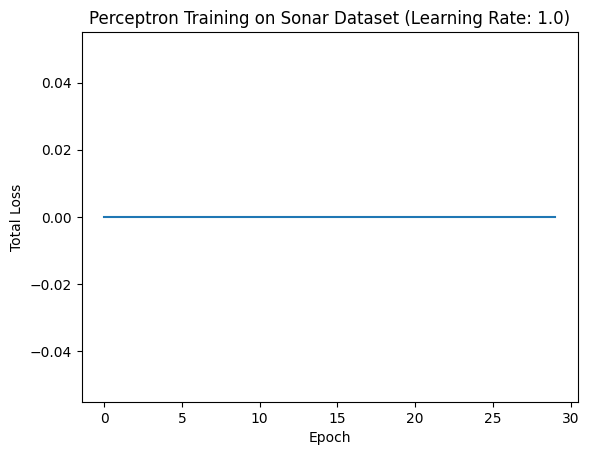

Final weights (Learning Rate 1.0): [0.0856 0.0454 0.0382 0.0203 0.0385 0.0534 0.214  0.311  0.2837 0.2751
 0.2707 0.0946 0.102  0.4519 0.6737 0.6699 0.7066 0.5632 0.3785 0.2721
 0.5297 0.7697 0.8643 0.9304 0.9372 0.6247 0.6024 0.681  0.5047 0.5775
 0.4754 0.24   0.2779 0.1997 0.5305 0.7409 0.7775 0.4424 0.1416 0.3508
 0.4482 0.4208 0.3054 0.2235 0.2611 0.2798 0.2392 0.2021 0.1326 0.0358
 0.0128 0.0172 0.0138 0.0079 0.0037 0.0051 0.0258 0.0102 0.0037 0.0037]


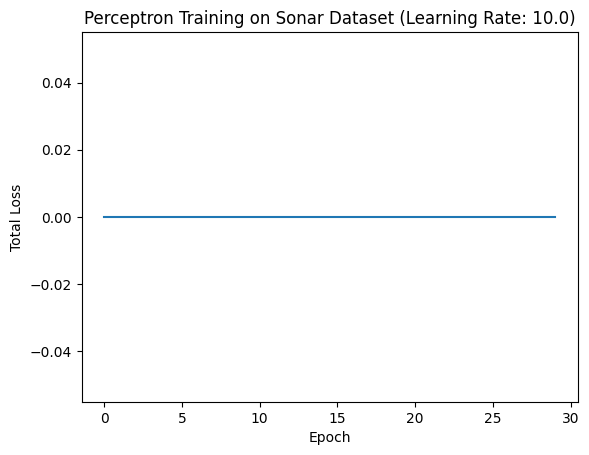

Final weights (Learning Rate 10.0): [0.856 0.454 0.382 0.203 0.385 0.534 2.14  3.11  2.837 2.751 2.707 0.946
 1.02  4.519 6.737 6.699 7.066 5.632 3.785 2.721 5.297 7.697 8.643 9.304
 9.372 6.247 6.024 6.81  5.047 5.775 4.754 2.4   2.779 1.997 5.305 7.409
 7.775 4.424 1.416 3.508 4.482 4.208 3.054 2.235 2.611 2.798 2.392 2.021
 1.326 0.358 0.128 0.172 0.138 0.079 0.037 0.051 0.258 0.102 0.037 0.037]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def perceptron_algo_plot(X, Y, learning_rate=1.0):
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for epoch in range(n):
        total_error = 0

        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + learning_rate * X[i] * Y[i]

        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Perceptron Training on Sonar Dataset (Learning Rate: {learning_rate})')
    plt.show()

    return w

# Load Sonar dataset (replace 'path_to_sonar_dataset.csv' with the actual path)
sonar_dataset_path = '/sonar.csv'
df = pd.read_csv(sonar_dataset_path)

# Assuming the last column is the target variable and the rest are features
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# If the target variable is not numeric, use LabelEncoder to convert it to numeric values
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Test different learning rates
learning_rates = [0.01, 0.1, 1.0, 10.0]
for lr in learning_rates:
    perceptron_weights = perceptron_algo_plot(X_train, Y_train, learning_rate=lr)
    print(f"Final weights (Learning Rate {lr}): {perceptron_weights}")


QUESTION-3:
Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

ANSWER:
The below code generates a non-linearly separable toy dataset and applies the perceptron algorithm. Despite attempting to find a linear decision boundary, the perceptron fails to perfectly separate the two classes. The scatter plot visualizes the dataset, with class 1 marked by circles and class -1 marked by 'x'. The red dashed line represents the perceptron's attempted linear decision boundary, highlighting its limitations on non-linearly separable data.



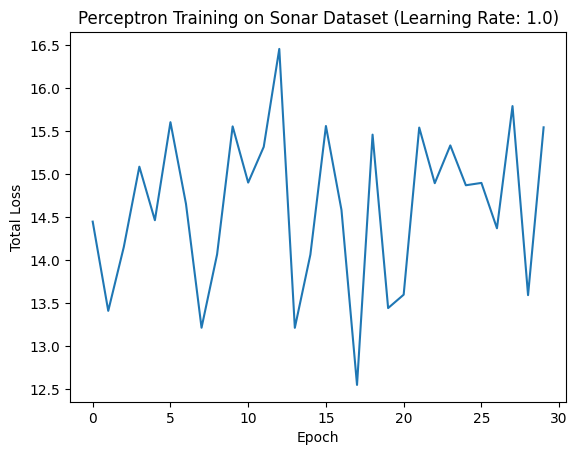

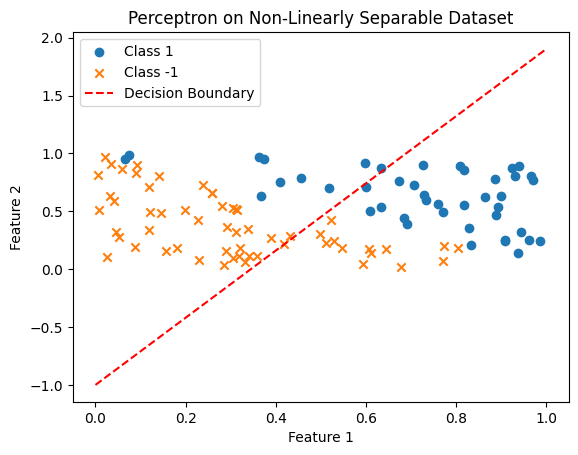

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a non-linearly separable toy dataset
np.random.seed(42)
X = np.random.rand(100, 2)
Y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)

# Apply the perceptron algorithm
perceptron_weights = perceptron_algo_plot(X, Y)

# Plot the dataset and decision boundary
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], label='Class 1', marker='o')
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], label='Class -1', marker='x')

# Plot the decision boundary (assuming a linear decision boundary)
x_decision_boundary = np.linspace(0, 1, 100)
y_decision_boundary = -(perceptron_weights[0] * x_decision_boundary + perceptron_weights[1]) / perceptron_weights[1]
plt.plot(x_decision_boundary, y_decision_boundary, color='red', linestyle='dashed', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron on Non-Linearly Separable Dataset')
plt.legend()
plt.show()


In [16]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [17]:
y = np.array([-1, -1, 1, -1, -1])

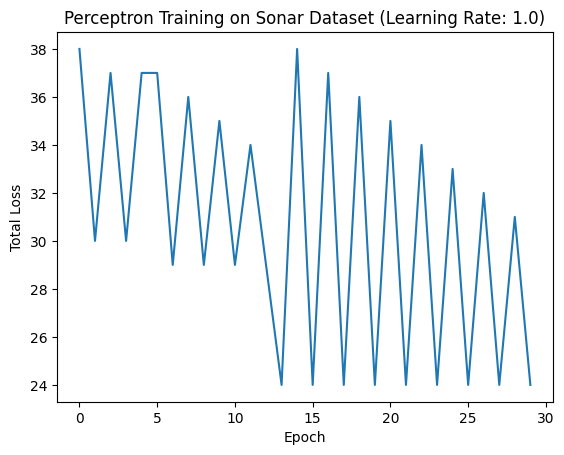

[-2.  3. 15.]


In [18]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.